# 📉📊📈**Comparing the Performance of Various Machine Learning Models for SLT Stock Price Prediction**📉📊📈


# ✅ **Logistic Regression** ✅

Logistic regression is a statistical model that estimates the probability of an event based on independent variables. It models the log-odds of the event as a linear combination of variables. It is commonly used for binary classification problems. Logistic regression is widely used for estimating model parameters in the logistic model.

# **Import Libraries**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Matplotlib and Seaborn for graphs and plottting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load data into a Data Frame**

In [92]:
# Import the dataset
dataset = pd.read_csv(r"..\1. dataset\TeleCom_2009_2023_Daily.csv")

# View Columns
dataset.head(100)

,Date,Price,Open,High,Low,Vol.,Change %
0,7/8/2009,46.50,48.0,48.0,46.50,9.90K,-0.53%
1,7/9/2009,46.00,47.0,47.0,45.75,17.40K,-1.08%
2,7/13/2009,45.75,46.0,47.0,45.75,22.10K,-0.54%
3,7/14/2009,45.75,45.5,46.0,45.00,20.60K,0.00%
4,7/15/2009,45.50,45.5,46.0,45.25,23.60K,-0.55%
...,...,...,...,...,...,...,...
95,11/25/2009,40.00,40.5,41.0,39.50,19.80K,-1.23%
96,11/26/2009,39.75,40.0,40.0,39.75,15.00K,-0.63%
97,11/27/2009,40.00,40.0,40.0,39.50,16.60K,0.63%
98,11/30/2009,41.25,40.5,42.0,40.25,8.20K,3.13%


# **Data Preprocessing**

In [93]:
dataset['Buy_Sell'] = np.where(dataset['Price'].shift(-1) > dataset['Price'],1,-1)

In [94]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,Buy_Sell
0,7/8/2009,46.50,48.0,48.0,46.50,9.90K,-0.53%,-1
1,7/9/2009,46.00,47.0,47.0,45.75,17.40K,-1.08%,-1
2,7/13/2009,45.75,46.0,47.0,45.75,22.10K,-0.54%,-1
3,7/14/2009,45.75,45.5,46.0,45.00,20.60K,0.00%,-1
4,7/15/2009,45.50,45.5,46.0,45.25,23.60K,-0.55%,-1


# **Null value testing and data clearance**

In [95]:
# See how many null values in each column

dataset.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        18
Change %     0
Buy_Sell     0
dtype: int64

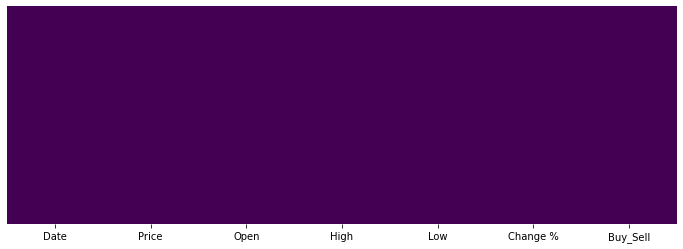

In [96]:
dataset = dataset.drop('Vol.', axis=1)
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [97]:
# see number of rows, number of columns
dataset.shape

(3239, 7)

In [98]:
#Total Records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  22673


In [99]:
# see columns names

dataset.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %', 'Buy_Sell'], dtype='object')

In [100]:
# See data types of the Columns

dataset.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
Buy_Sell      int32
dtype: object

In [101]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3239 non-null   object 
 1   Price     3239 non-null   float64
 2   Open      3239 non-null   float64
 3   High      3239 non-null   float64
 4   Low       3239 non-null   float64
 5   Change %  3239 non-null   object 
 6   Buy_Sell  3239 non-null   int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 164.6+ KB


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Buy_Sell'}>, <AxesSubplot:>]],
      dtype=object)

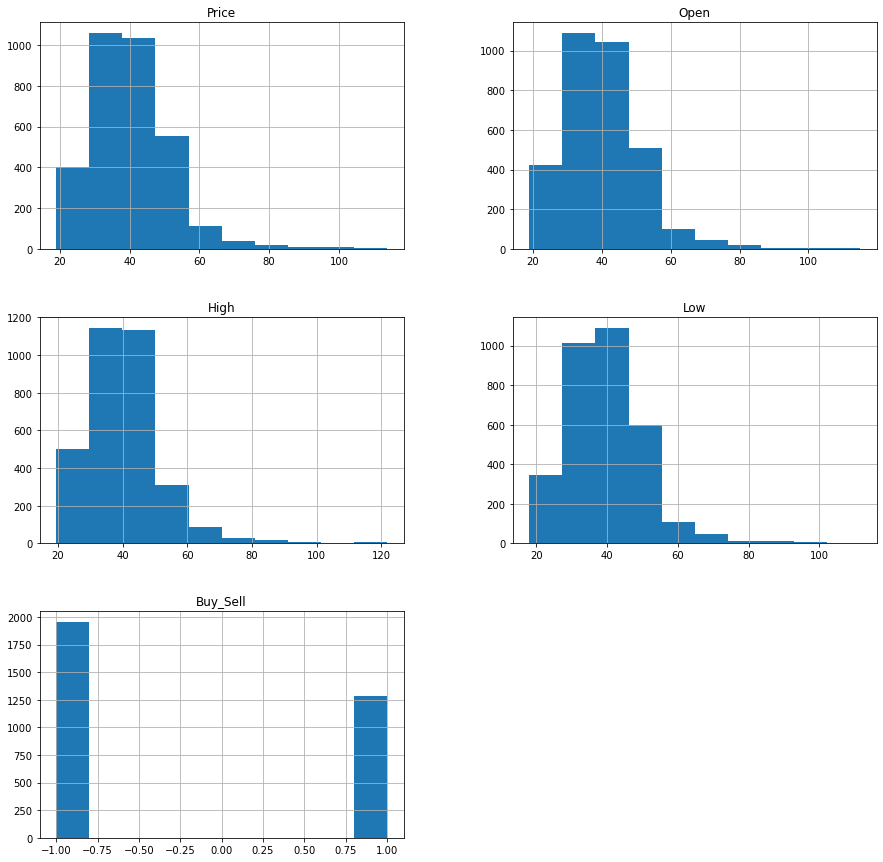

In [102]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [103]:
# The statistics per each column

dataset.describe()

,Price,Open,High,Low,Buy_Sell
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000
mean,40.195088,40.184687,40.860157,39.426984,-0.206545
std,11.390835,11.416385,11.805006,11.034471,0.978588
min,19.000000,19.000000,19.500000,18.000000,-1.000000
25%,32.500000,32.700000,33.000000,32.000000,-1.000000
50%,39.000000,39.000000,39.800000,38.500000,-1.000000
75%,47.000000,47.000000,47.550000,46.000000,1.000000
max,113.750000,115.000000,121.750000,111.500000,1.000000


# **Define X and Y**

In [104]:
dataset['Buy_Sell'] = dataset['Buy_Sell'].astype('int')

In [105]:
# Define X
X = np.asarray(dataset[['Open', 'High', 'Low', 'Price']])
X[0:5]

array([[48.  , 48.  , 46.5 , 46.5 ],
       [47.  , 47.  , 45.75, 46.  ],
       [46.  , 47.  , 45.75, 45.75],
       [45.5 , 46.  , 45.  , 45.75],
       [45.5 , 46.  , 45.25, 45.5 ]])

In [106]:
# Define y
y = np.asarray(dataset['Buy_Sell'])
y[0:5]

array([-1, -1, -1, -1, -1])

In [107]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[0.68, 0.6 , 0.64, 0.55],
       [0.6 , 0.52, 0.57, 0.51],
       [0.51, 0.52, 0.57, 0.49],
       [0.47, 0.44, 0.51, 0.49],
       [0.47, 0.44, 0.53, 0.47]])

# **Split Train data and Test data**

In [108]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2429, 4) (2429,)
Test set: (810, 4) (810,)


# **Dataset Traning and Model Traning**

In [109]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

# **Comparison of Actual Values and Predictions Values**

In [110]:
# Predicting the Test set results
yhat = LR.predict(X_test)
yhat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [111]:
# predict_proba is returns of estimates for all classes, ordered by the label of classes. 
# The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59, 0.41],
       [0.58, 0.42],
       [0.58, 0.42],
       ...,
       [0.58, 0.42],
       [0.59, 0.41],
       [0.58, 0.42]])

In [112]:
# Making the Confusion Matrix
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.0

In [113]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[0 0]
 [0 0]]


# **Accuracy and Loss Function Values of the Model**

Confusion matrix, without normalization
[[0 0]
 [0 0]]


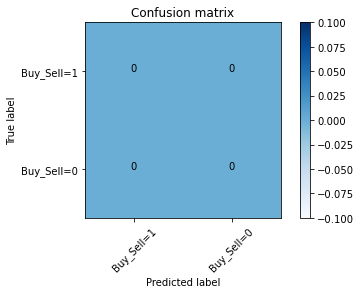

In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Buy_Sell=1','Buy_Sell=0'],normalize= False,  title='Confusion matrix')

In [115]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.62      1.00      0.77       502
           1       0.00      0.00      0.00       308

    accuracy                           0.62       810
   macro avg       0.31      0.50      0.38       810
weighted avg       0.38      0.62      0.47       810



In [116]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("Precision:",metrics.precision_score(y_test, yhat))
print("Recall:",metrics.recall_score(y_test, yhat))

Accuracy: 0.6197530864197531
Precision: 0.0
Recall: 0.0


In [117]:
# Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6668765080044472

In [118]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.67


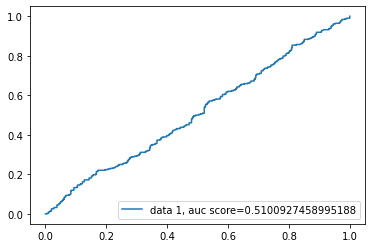

In [119]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucScore = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc score="+str(aucScore))
plt.legend(loc=4)
plt.show()

In [120]:
#Display logloss
print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.67


In [121]:
#Display accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, yhat))


Accuracy: 0.6197530864197531
